**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar, root
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

par.w = 1.0

# Question 3
par.kappa = 0.1

In [3]:
# We define the optimal labor for a given price p
def optimal_labor(p):
    return (p * par.A * par.gamma / par.w) ** (1 / (1 - par.gamma))

# Define the optimal output for a given labor l
def optimal_output(l):
    return par.A * l ** par.gamma

# Define profits for a given price
def profits(p):
    return ((1-par.gamma)/par.gamma) * par.w * ((p * par.A * par.gamma)/par.w)**(1/(1-par.gamma))

# Define demand for good 1 given prices p1, p2, and labor l
def demand_of_good1(p1, p2, l):
    budget = par.w * l + par.T + profits(p1) + profits(p2)
    return par.alpha * budget / p1

# Define demand for good 3 given prices p1, p2, and labor l
def demand_of_good2(p1, p2, l):
    budget = par.w * l + par.T + profits(p1) + profits(p2)
    return (1-par.alpha) * budget / (p2 + par.tau)

# Lastly, we optimize labor to maximize utility given prices p1 and p2
def Amount_of_labor(p1, p2):
    def objective(l):
        c1 = demand_of_good1(p1, p2, l)
        c2 = demand_of_good2(p1, p2, l)
        return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l ** (1 + par.epsilon) / (1 + par.epsilon)
    
    final = minimize_scalar(lambda l: -objective(l), bounds=(0, 100), method='bounded')
    return final.x

# We loop over price ranges, calculate supply and demand, and print results
for p1 in np.linspace(0.1, 2.0, 10):
    for p2 in np.linspace(0.1, 2.0, 10):
        demand_of_labor1 = optimal_labor(p1)
        demand_of_labor2 = optimal_labor(p2)
        l = Amount_of_labor(p1, p2)
        supply_of_good1 = optimal_output(demand_of_labor1)
        supply_of_good2 = optimal_output(demand_of_labor2)
        c1 = demand_of_good1(p1, p2, l)
        c2 = demand_of_good2(p1, p2, l)

        LaborMarket = l - demand_of_labor1 - demand_of_labor2
        GoodMarket1 = supply_of_good1 - c1
        GoodMarket2 = supply_of_good2 - c2

print(f'The supply on labor market: {LaborMarket:.2f}, The supply on the market for good 1: {GoodMarket1:.2f}, The supply on the market for good 2: {GoodMarket2:.2f}')

The supply on labor market: -1.38, The supply on the market for good 1: 0.61, The supply on the market for good 2: 0.08


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [4]:
# Define function to calculate excess demand given prices (fees). We calculate the value of different variables.
def excess_demand(fees):
    p1, p2 = fees
    demand_of_labor1 = optimal_labor(p1)  
    demand_of_labor2 = optimal_labor(p2)      
    supply_of_good1 = optimal_output(demand_of_labor1)  
    supply_of_good2 = optimal_output(demand_of_labor2)  
    l = Amount_of_labor(p1, p2)              
    c1 = demand_of_good1(p1, p2, l)        
    c2 = demand_of_good2(p1, p2, l)             
    LaborMarket = l - demand_of_labor1 - demand_of_labor2 
    GoodMarket1 = supply_of_good1 - c1         
    return [LaborMarket, GoodMarket1]            

# We find equilibrium prices that balance the markets
final = root(excess_demand, [1.0, 1.0])

# We lastly check if equilibrium was found and show the results
if final.success:
    p_equilibrium = final.x
    print(f'In equilibrium the prices are: price 1 = {p_equilibrium[0]:.2f} and price 2 = {p_equilibrium[1]:.2f}')
else:
    print('There is no equilibrium')


In equilibrium the prices are: price 1 = 0.98 and price 2 = 1.49


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [5]:
# Function to find equilibrium prices given tau and T
def equi(tau, T):
    par.tau = tau       
    par.T = T               
    prices = [1.0, 1.0]  
    final = root(excess_demand, prices)  

    # We calculate optimal total labor and demand for good 2. We then return the demand for good 2 and the equilibrium prices.
    if final.success:
        Prices = final.x
        l = Amount_of_labor(Prices[0], Prices[1]) 
        c2 = demand_of_good2(Prices[0], Prices[1], l) 
        return c2, Prices  
    else:
        raise ValueError('There are no equilibrium prices')

# Function to calculate social welfare. It depends on the tax rate and T
def SW(tau):
    T = 0               
    convergence_threshold = 1e-6
    max_steps = 199
    current_step = 0
    while current_step < max_steps:
        current_step += 1
        earlier_T = T
        c2, Prices = equi(tau, T) 
        T = c2 * tau          
        
        if abs(T - earlier_T) < convergence_threshold:
            break
    c2, Prices = equi(tau, T)     
    l = Amount_of_labor(Prices[0], Prices[1])  
    c1 = demand_of_good1(Prices[0], Prices[1], l) 
    c2 = demand_of_good2(Prices[0], Prices[1], l) 
    utility = np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l ** (1 + par.epsilon) / (1 + par.epsilon)
    SocialWelfareF = utility - par.kappa * c2  
    return -SocialWelfareF  

# We now find the optimal tax rate to maximize the social welfare
tau_optimal = minimize_scalar(SW, bounds=(0, 1), method='bounded')

# At last, we print the optimal tau and T.
if tau_optimal.success:
    opti_tau = tau_optimal.x
    optimal_T = opti_tau * equi(opti_tau, 0)[0] 
    print(f'The optimal tau and T that maximizes the social welfare function is: tau = {opti_tau:.2f} and T = {optimal_T:.2f}')
else:
    print('There is no optimal tau or T')


The optimal tau and T that maximizes the social welfare function is: tau = 0.17 and T = 0.11


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
# We start by simulating the epsilon values
epsilon = np.random.normal(0, par.sigma, (par.J, par.K))

# Expected utility is calculated
expected_utility = par.v + np.mean(epsilon, axis=1)

# The average realized utility for each career track is calculated
realized_utility = par.v[:, None] + epsilon
average_realized_utility = np.mean(realized_utility, axis=1)

print("Expected Utility:", expected_utility)
print("Average Realized Utility:", average_realized_utility)

Expected Utility: [1.00591932 2.00856601 3.00869215]
Average Realized Utility: [1.00591932 2.00856601 3.00869215]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

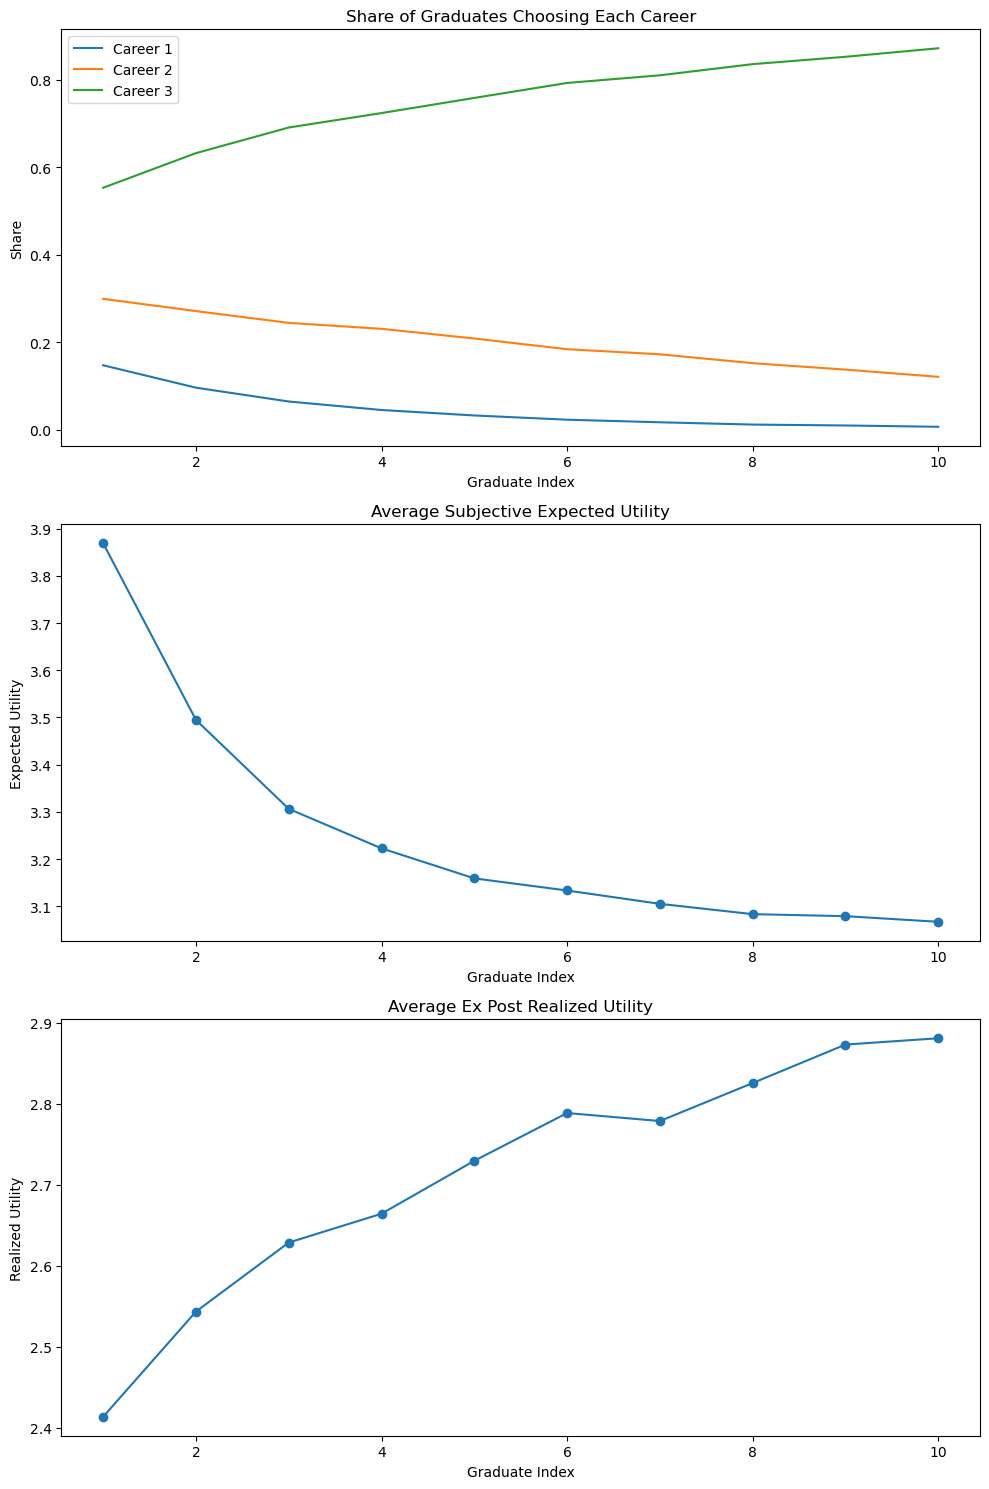

In [8]:
# Storage for results
chosen_careers = np.zeros((par.N, par.K), dtype=int)
expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

for k in range(par.K):
    for i in range(1, par.N + 1):
        # Now epsilon values for friends and self is found
        epsilon_friends = np.random.normal(0, par.sigma, (par.J, i))
        epsilon_self = np.random.normal(0, par.sigma, par.J)
        
        # Prior expected utilities
        prior_expected_utility = par.v + np.mean(epsilon_friends, axis=1)
        
        # We choose career with highest expected utility
        chosen_career = np.argmax(prior_expected_utility)
        
        # And now we store the results
        chosen_careers[i - 1, k] = chosen_career
        expected_utilities[i - 1, k] = prior_expected_utility[chosen_career]
        realized_utilities[i - 1, k] = par.v[chosen_career] + epsilon_self[chosen_career]

# Calculate shares, average expected utilities, and average realized utilities
career_shares = np.mean(chosen_careers == np.arange(par.J)[:, None, None], axis=2)
average_expected_utilities = np.mean(expected_utilities, axis=1)
average_realized_utilities = np.mean(realized_utilities, axis=1)

# Plotting results
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Career choice shares
for j in range(par.J):
    axes[0].plot(range(1, par.N + 1), career_shares[j], label=f'Career {j + 1}')
axes[0].set_title('Share of Graduates Choosing Each Career')
axes[0].set_xlabel('Graduate Index')
axes[0].set_ylabel('Share')
axes[0].legend()

# Average expected utilities
axes[1].plot(range(1, par.N + 1), average_expected_utilities, marker='o')
axes[1].set_title('Average Subjective Expected Utility')
axes[1].set_xlabel('Graduate Index')
axes[1].set_ylabel('Expected Utility')

# Average realized utilities
axes[2].plot(range(1, par.N + 1), average_realized_utilities, marker='o')
axes[2].set_title('Average Ex Post Realized Utility')
axes[2].set_xlabel('Graduate Index')
axes[2].set_ylabel('Realized Utility')

plt.tight_layout()
plt.show()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

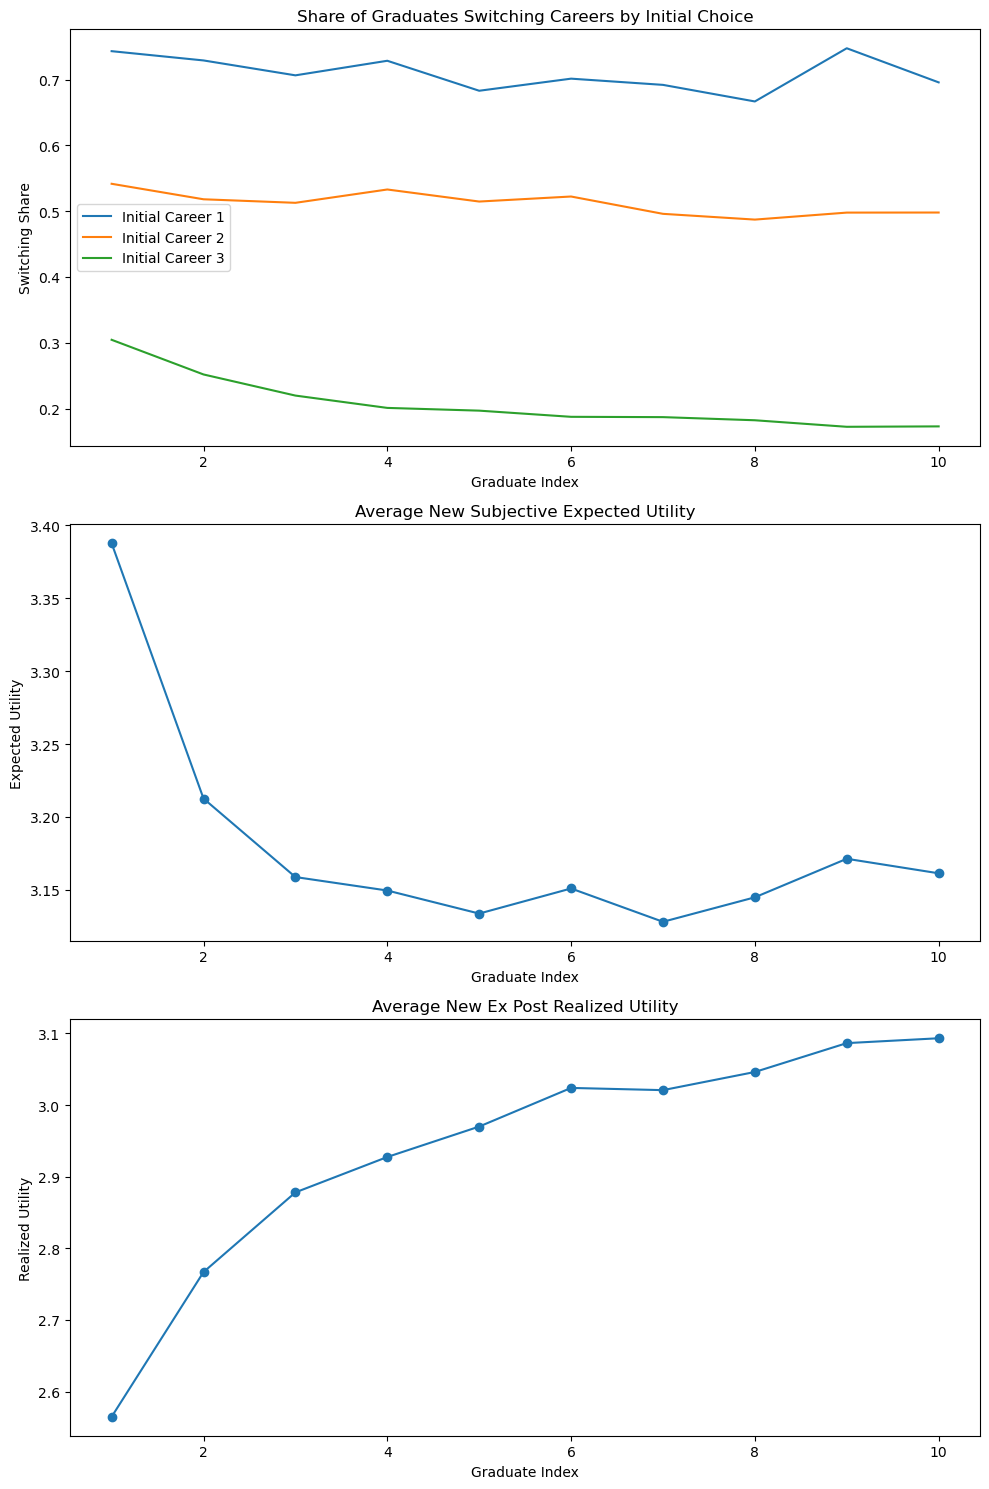

In [9]:
# Storage for new results
new_chosen_careers = np.zeros((par.N, par.K), dtype=int)
new_expected_utilities = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switches = np.zeros((par.N, par.K), dtype=bool)

# New Simulation considering switching costs
for k in range(par.K):
    for i in range(1, par.N + 1):
        initial_career = chosen_careers[i - 1, k]
        initial_realized_utility = realized_utilities[i - 1, k]
        
        # Draw epsilon values again based on the new information
        epsilon_friends = np.random.normal(0, par.sigma, (par.J, i))
        
        # Here we calculate new prior expected utilities including switching cost
        new_prior_expected_utility = par.v + np.mean(epsilon_friends, axis=1)
        new_prior_expected_utility -= par.c  # Apply switching cost to all careers initially
        
        # Correct the utility for the initially chosen career
        new_prior_expected_utility[initial_career] = initial_realized_utility
        
        # Draw epsilon values for self
        epsilon_self = np.random.normal(0, par.sigma, par.J)
        
        # Calculate new realized utilities including the given switching cost
        new_realized_utility = par.v + epsilon_self - par.c
        new_realized_utility[initial_career] = initial_realized_utility
        
        # The new optimal career is chosen
        new_chosen_career = np.argmax(new_prior_expected_utility)
        
        # Results are being stored
        new_chosen_careers[i - 1, k] = new_chosen_career
        new_expected_utilities[i - 1, k] = new_prior_expected_utility[new_chosen_career]
        new_realized_utilities[i - 1, k] = new_realized_utility[new_chosen_career]
        switches[i - 1, k] = new_chosen_career != initial_career

# Now we calculate averages and shares
average_new_expected_utilities = np.mean(new_expected_utilities, axis=1)
average_new_realized_utilities = np.mean(new_realized_utilities, axis=1)
switch_shares = np.mean(switches, axis=1)

# Calculate share of graduates that choose to switch careers based on initial choice
initial_career_choices = chosen_careers + 1 
switch_shares_by_initial = np.zeros((par.J, par.N))

for j in range(par.J):
    for i in range(1, par.N + 1):
        switches_given_initial = switches[i - 1, initial_career_choices[i - 1] == (j + 1)]
        switch_shares_by_initial[j, i - 1] = np.mean(switches_given_initial)

# Now the results are being plotted
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Share of graduates that choose to switch careers based on initial choice
for j in range(par.J):
    axes[0].plot(range(1, par.N + 1), switch_shares_by_initial[j], label=f'Initial Career {j + 1}')
axes[0].set_title('Share of Graduates Switching Careers by Initial Choice')
axes[0].set_xlabel('Graduate Index')
axes[0].set_ylabel('Switching Share')
axes[0].legend()

# Average new expected utilities
axes[1].plot(range(1, par.N + 1), average_new_expected_utilities, marker='o')
axes[1].set_title('Average New Subjective Expected Utility')
axes[1].set_xlabel('Graduate Index')
axes[1].set_ylabel('Expected Utility')

# Average new realized utilities
axes[2].plot(range(1, par.N + 1), average_new_realized_utilities, marker='o')
axes[2].set_title('Average New Ex Post Realized Utility')
axes[2].set_xlabel('Graduate Index')
axes[2].set_ylabel('Realized Utility')

plt.tight_layout()
plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [10]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

Coordinates of A: [0.26071605 0.43635845]
Coordinates of B: [0.21315735 0.274245  ]
Coordinates of C: [0.10056103 0.27951775]
Coordinates of D: [0.20634391 0.44272557]


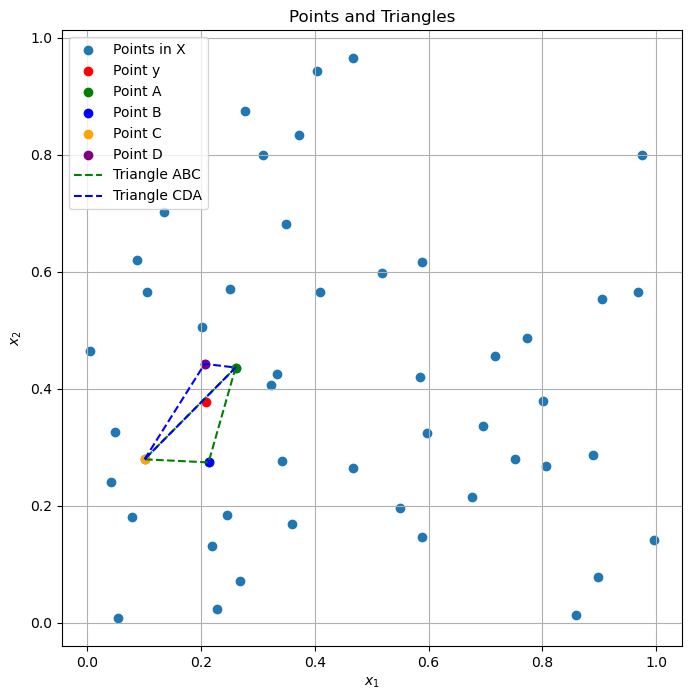

In [18]:
# Here we define a function that minimizes distance to our conditions we got (Source AI for np.nan)
def find_point(X, y, cond):
    distances = np.sqrt((X[:, 0] - y[0])**2 + (X[:, 1] - y[1])**2)
    filtered_indices = np.where(cond(X, y))[0]
    if filtered_indices.size == 0:
        return np.array([np.nan, np.nan])
    closest_point_index = filtered_indices[np.argmin(distances[filtered_indices])]
    return X[closest_point_index]

# The conditions for A, B, C, and D from the text is defined
cond_A = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] > y[1])
cond_B = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] < y[1])
cond_C = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] < y[1])
cond_D = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] > y[1])

# Now we find A, B, C and D so we can print them in the next step
A = find_point(X, y, cond_A)
B = find_point(X, y, cond_B)
C = find_point(X, y, cond_C)
D = find_point(X, y, cond_D)

# The coordinates for A, B, C, and D are printed
print(f"Coordinates of A: {A}")
print(f"Coordinates of B: {B}")
print(f"Coordinates of C: {C}")
print(f"Coordinates of D: {D}")

# The points and triangles are being plotted
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='Points in X')
plt.scatter(y[0], y[1], color='red', label='Point y')
plt.scatter(A[0], A[1], color='green', label='Point A')
plt.scatter(B[0], B[1], color='blue', label='Point B')
plt.scatter(C[0], C[1], color='orange', label='Point C')
plt.scatter(D[0], D[1], color='purple', label='Point D')


# The triangles ABC and CDA is plotted if they are valid (Source AI for np.isnan)
if not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'g--', label='Triangle ABC')

if not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'b--', label='Triangle CDA')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Points and Triangles')
plt.grid(True)
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [19]:
# We start defining the function so we can calculate the barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Barycentric coordinates is computed for the triangles ABC and CDA
if not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
    r_ABC = barycentric_coordinates(y, A, B, C)
else:
    r_ABC = (np.nan, np.nan, np.nan)

if not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
    r_CDA = barycentric_coordinates(y, C, D, A)
else:
    r_CDA = (np.nan, np.nan, np.nan)

# Determine if y is inside the triangle
def is_inside_triangle(r):
    return all(0 <= coord <= 1 for coord in r)

inside_ABC = is_inside_triangle(r_ABC)
inside_CDA = is_inside_triangle(r_CDA)

# Print results
print(f"The barycentric coordinates of y with respect to triangle ABC: {r_ABC}")
print(f"The barycentric coordinates of y with respect to triangle CDA: {r_CDA}")

if inside_ABC:
    print("The point y is inside the triangle ABC.")
elif inside_CDA:
    print("The point y is inside the triangle CDA.")
else:
    print("The point y is not inside either triangle ABC or CDA.")

The barycentric coordinates of y with respect to triangle ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
The barycentric coordinates of y with respect to triangle CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
The point y is inside the triangle ABC.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [13]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [14]:
# Now we compute the approximation of f(y) based on the barycentric coordinates
if inside_ABC:
    f_approx = r_ABC[0] * f(A) + r_ABC[1] * f(B) + r_ABC[2] * f(C)
elif inside_CDA:
    f_approx = r_CDA[0] * f(C) + r_CDA[1] * f(D) + r_CDA[2] * f(A)
else:
    f_approx = np.nan

# The true value of f(y)
f_true = f(y)

print(f"Approximation of f(y) using the algorithm: {f_approx}")
print(f"True value of f(y): {f_true}")
print(f"Difference: {abs(f_true - f_approx)}") #To check if there is a difference between the two values

Approximation of f(y) using the algorithm: 0.08405201731052576
True value of f(y): 0.0789565216259594
Difference: 0.005095495684566367


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [15]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [16]:
# The lists are initialized to store results
approximations = []
true_values = []
differences = []

# All points are repeated for Y (note that we call it y1 here, because in the sample you gave in the beginning it is also called y)
for y1 in Y:
    y1 = np.array(y1)
    
    # Now A, B, C, and D will be found. Note that we call alphabeats for A1 etc. becuase we used them in question 2.
    A1 = find_point(X, y1, cond_A)
    B1 = find_point(X, y1, cond_B)
    C1 = find_point(X, y1, cond_C)
    D1 = find_point(X, y1, cond_D)

    # Here the barycentric coordinates for triangles ABC and CDA are computed
    if not np.isnan(A1).any() and not np.isnan(B1).any() and not np.isnan(C1).any():
        r1_ABC = barycentric_coordinates(y1, A1, B1, C1)
    else:
        r1_ABC = (np.nan, np.nan, np.nan)

    if not np.isnan(C1).any() and not np.isnan(D1).any() and not np.isnan(A1).any():
        r1_CDA = barycentric_coordinates(y1, C1, D1, A1) # Note that we write r1 because we used "r" in question 2
    else:
        r1_CDA = (np.nan, np.nan, np.nan)

    # Checking if y is inside the triangle
    inside_ABC1 = is_inside_triangle(r1_ABC)
    inside_CDA1 = is_inside_triangle(r1_CDA)

    # The approximation of f(y) based on the barycentric coordinates is computed
    if inside_ABC1:
        f_approx = r1_ABC[0] * f(A1) + r1_ABC[1] * f(B1) + r1_ABC[2] * f(C1)
    elif inside_CDA1:
        f_approx = r1_CDA[0] * f(C1) + r1_CDA[1] * f(D1) + r1_CDA[2] * f(A1)
    else:
        f_approx = np.nan

    # True value of f(y)
    f_true = f(y1)

    # Store results
    approximations.append(f_approx)
    true_values.append(f_true)
    differences.append(abs(f_true - f_approx))

# Now the results are being printed
for i, y1 in enumerate(Y):
    print(f"Point {y1}:")
    print(f"  Approximation of f(y): {approximations[i]}")
    print(f"  True value of f(y): {true_values[i]}")
    print(f"  Difference: {differences[i]}")
    print()

Point (0.2, 0.2):
  Approximation of f(y): 0.04032631372248057
  True value of f(y): 0.04000000000000001
  Difference: 0.0003263137224805632

Point (0.8, 0.2):
  Approximation of f(y): 0.15874233999349835
  True value of f(y): 0.16000000000000003
  Difference: 0.0012576600065016819

Point (0.8, 0.8):
  Approximation of f(y): nan
  True value of f(y): 0.6400000000000001
  Difference: nan

Point (0.8, 0.2):
  Approximation of f(y): 0.15874233999349835
  True value of f(y): 0.16000000000000003
  Difference: 0.0012576600065016819

Point (0.5, 0.5):
  Approximation of f(y): 0.2512901561119622
  True value of f(y): 0.25
  Difference: 0.001290156111962204

